In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
import pandas as pd
import matplotlib

## einsum to calculate closest

In [2]:
def einsum_closest(source_xy, targets_xy, method='euclidean'):
    source = np.asarray(source_xy)
    deltas = targets_xy - source
    if method.lower() == 'euclidean':
        dist = np.sqrt(np.einsum('ij,ij->i', deltas, deltas))
        return np.min(dist), np.argmin(dist)
    elif method.lower() == 'manhattan':
        dist = (
            np.sqrt(np.einsum('i,i->i', deltas[:, 0], deltas[:, 0])) +
            np.sqrt(np.einsum('i,i->i', deltas[:, 1], deltas[:, 1]))
        )
        return np.min(dist), np.argmin(dist)
    else:
        raise ValueError('a valid method is either "Euclidean", or "Manhattan".')

In [3]:
def nearest_neighbor(sources_xy, targets_xy):
    f = lambda source: einsum_closest(source, targets_xy)[1]
    return np.array(list(map(f, sources_xy)))

In [4]:
def plotArrow(A, B, ax):
    arrow = ax.arrow(A[0], A[1], B[0]-A[0], B[1]-A[1], head_width=0.15, 
            color='black', linestyle=(1,(5,5)), head_length=0.2,
            length_includes_head=True, overhang=0.5, label="distance")
    return arrow

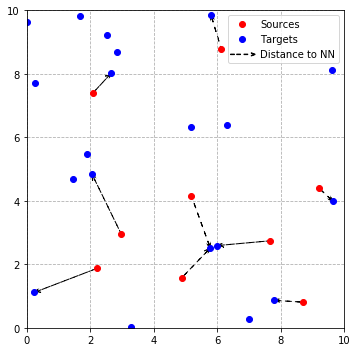

In [10]:
np.random.seed(5)

x1 = np.random.rand(9) * 10
y1 = np.random.rand(9) * 10
x2 = np.random.rand(20) * 10
y2 = np.random.rand(20) * 10

nearest_array = nearest_neighbor(np.column_stack((x1, y1)), np.column_stack((x2, y2)))

fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)


ax.grid(True, 'both', linestyle="--")

source = ax.plot(x1, y1, 'ro', label="Sources")
target = ax.plot(x2, y2, 'bo', label="Targets")

ax.set_aspect('equal')

for source, target in enumerate(nearest_array):
    plotArrow((x1[source], y1[source]), (x2[target], y2[target]), ax)
    
# arrow1.set_label = "Distance to NN"

patches = [ax.plot([],[], marker="o", ls="", color='red', label="Sources")[0],
           ax.plot([],[], marker="o", ls="", color='blue', label="Targets")[0], 
           ax.plot([],[], marker="$--->$", ms=25, ls="", color='black', label="Distance to NN")[0]]
           
ax.legend(handles=patches, loc="best", fontsize="medium")
plt.tight_layout()

fig.savefig("./nearest_neighbor_illustration.png", dpi=300)